# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import print_function, division
import pandas as pd

from __future__ import print_function, division
import numpy as np

#### Copied from StackoverFlow

In [32]:
#by writing a function 
#copied from stackoverflow
import numpy as np  
import matplotlib.pyplot as plt  
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = eval(formula)
    plt.plot(x, y)  
    plt.show()

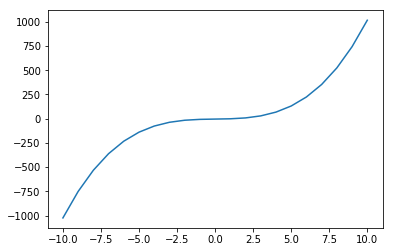

In [33]:
graph('x**3+2*x-4', range(-10, 11))

### (My Own)A valid function

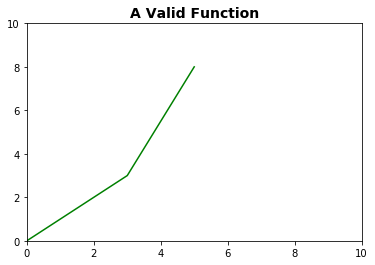

In [45]:
#My own work
x = [0, 3, 5]
y = [0, 3, 8]
# Plot the Scaled Vectors
plt.plot(x,y, color ='green')
#plt.plot(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(0,10)          
plt.ylim(0,10)
plt.title("A Valid Function", fontsize = 14, fontweight = "bold")
plt.show()

### Invalid or Not a Function

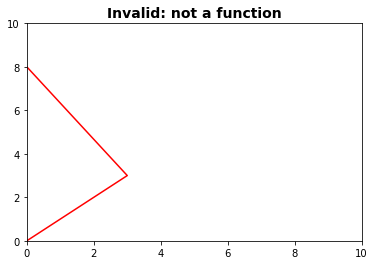

In [43]:
x = [0, 3, 0]
y = [0, 3, 8]
# Plot the Scaled Vectors
plt.plot(x,y, color ='red')
#plt.plot(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(0,10)          
plt.ylim(0,10)
plt.title("Invalid: not a function", fontsize = 14, fontweight = "bold")
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

By definition, a function maps an input to an unique output. If we swipe a verticle line through the graph, each point on x maps only unique point on the graph. That mean, every x-value of a function must be paired to a single y-value

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 1: No, it is not a function. same value of x =1 produces different values of y = 2 and also 3
relation 2: Yes, it's a function. Each value of x pairs with a single/unique value of y
relation 3: No, it's not a function. when x = 9, it produces two values of y = 4, and 6
relation 4: no, not a relation. when x = 6, y = 2, and 4. Invalid.
relation 5: No, for the same value of x =3, there are 3 y values y = 6, 7, and 4

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

### For the first function m(𝑥_1,𝑥_2,𝑥_3) = (x_1+x_2, x_1+x_3, x_2+x_3):
the dimensionality of the domain (input) is 3 and the codomain (output/range) is also 3

### for the second function n(𝑥_1,𝑥_2,𝑥_3,𝑥_4) = (x_2^2 + x_3, x_2x_4):
he dimensionality of the domain (input) is 3 and the codomain (output/range) is 2



## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes, it's possible. For exmaple if we have a 2x1 dimension vector and we multiply it with 3x2 dimension matrix, the resulting vector will be a 3X1 vector. 

\begin{align}
\begin{bmatrix} 1 & 3 \\ -1 & 2 \\ 1 & 2\end{bmatrix} X\begin{bmatrix} 3 \\ 4 \end{bmatrix}
\end{align}

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}


\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\end{align}


\begin{align}
\\
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = x_1\begin{bmatrix} 1 \\ 0 \end{bmatrix} + x_2\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\\
\end{align}

\begin{align}
p(\begin{bmatrix} 1 \\ 0 \end{bmatrix}) = \begin{bmatrix} 1 \\ -1 \end{bmatrix}
\\
p(\begin{bmatrix} 0 \\ 1 \end{bmatrix}) = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

\begin{align}
T = \begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}
\end{align}


\begin{align}
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{align}
\\
\begin{bmatrix} x_1 \\ x_2 \\x_3 \end{bmatrix} = x_1\begin{bmatrix} 1 \\ 0 \\0\end{bmatrix} + x_2\begin{bmatrix} 0 \\ 1 \\0 \end{bmatrix}+ x_3\begin{bmatrix} 0 \\ 0 \\1\end{bmatrix}\\
\\
\end{align}

\begin{align}
f(\begin{bmatrix} 1 \\ 0 \\0\end{bmatrix}) = \begin{bmatrix} 4 \\ -1 \\ 5\end{bmatrix}
\\
f(\begin{bmatrix} 0 \\ 1 \\0\end{bmatrix}) = \begin{bmatrix} 1 \\ 2 \\1\end{bmatrix}
\\
f(\begin{bmatrix} 0 \\ 0 \\1\end{bmatrix}) = \begin{bmatrix} 2 \\ 3 \\-2\end{bmatrix}
\end{align}


\begin{align}
T = \begin{bmatrix} 4 & 1 & 2 \\ -1 & 2 & 3 \\ 5 & 1 & -2 \end{bmatrix}
\end{align}


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.


\begin{align}
T = \begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}
\end{align}

\begin{align}
\begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}\begin{bmatrix} 3 \\ 4 \end{bmatrix} = \begin{bmatrix} 3*1 + 3*4 \\ -1*3 + 2*4 \end{bmatrix}\begin{bmatrix} 15 \\ 5\end{bmatrix}
\end{align}

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\end{align}

\begin{align}
p(\begin{bmatrix}3 \\ 4 \end{bmatrix}) = \begin{bmatrix} 15 \\5\\  \end{bmatrix}
\end{align}


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvalue is a scale by which the eigenvector can be extended, squished, or expanded. Eigenvectors are basis vector which don't change the direction. 

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

Some of the challenges are:
1. how to represent data when it has more than 3 dimensions
2. Quantifying the marginal gain/utility of additonal features(dimisnhing returns)
3.added analysis work
4. data get more spread out

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

the rule of thumb is that the observations should be 5 times the number of features/parameters in your dataset. Because if that's not the case, we will run into the problem of overfitting the model.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

### The first solution is follow along from the link bellow, while the next one is mostly my own understanding of handling data with help from the link in plotting

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [99]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [100]:
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [101]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [102]:
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [103]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [104]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [142]:
finalDf

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
5,-2.070537,1.518549,Iris-setosa
6,-2.445711,0.074563,Iris-setosa
7,-2.233842,0.247614,Iris-setosa
8,-2.341958,-1.095146,Iris-setosa
9,-2.188676,-0.448629,Iris-setosa


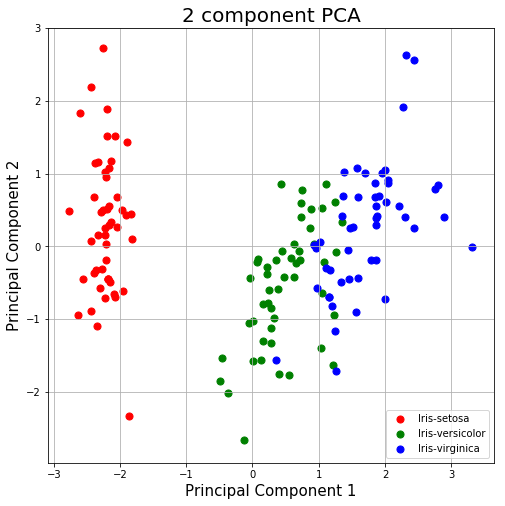

In [147]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### My own version of doing PCA 

In [120]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')

In [121]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [122]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [123]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [124]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [125]:
df_x = df[['sepal_length','sepal_width', 'petal_length', 'petal_width']]

In [126]:
df_x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [127]:
df_y = df[['species']]

In [128]:
df_x.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [132]:
#lets transform X
from sklearn.preprocessing import StandardScaler
x_Std = StandardScaler().fit_transform(df_x)

In [133]:
x_Std

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [134]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_Components = pca.fit_transform(x_Std)
principal_Df = pd.DataFrame(data = principal_Components
             , columns = ['principal component 1', 'principal component 2'])

In [136]:
final_Df = pd.concat([principal_Df, df_y[['species']]], axis = 1)

In [141]:
final_Df

,principal component 1,principal component 2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
5,-2.070537,1.518549,setosa
6,-2.445711,0.074563,setosa
7,-2.233842,0.247614,setosa
8,-2.341958,-1.095146,setosa
9,-2.188676,-0.448629,setosa


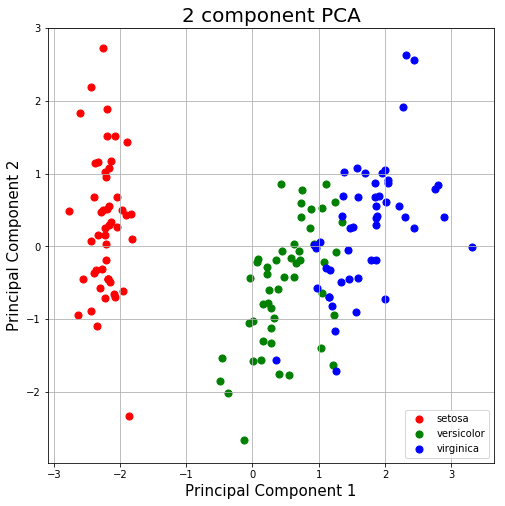

In [146]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_Df['species'] == target
    ax.scatter(final_Df.loc[indicesToKeep, 'principal component 1']
               , final_Df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
   # print(indicesToKeep)
ax.legend(targets)
ax.grid()

### Standardizing
### 1 - Eigendecomposition - Computing Eigenvectors and Eigenvalues
The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)